In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from nltk.tokenize import TreebankWordTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/johnnyjheng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnnyjheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Scopus_Evaluated.csv')

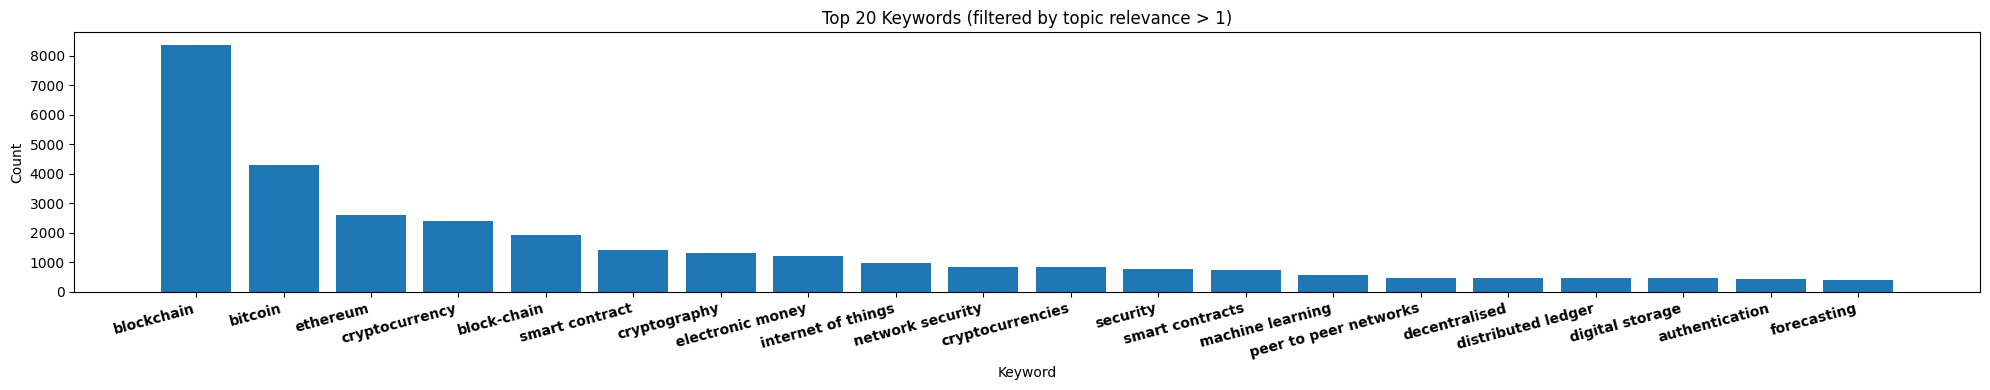

In [3]:
topic_cols = ['Asset Allocation', 'Indexing', 'Bubbles', 'Valuation Models', 'Trading']
df_filtered = df[(df[topic_cols] != 1).any(axis=1)]

keywords_series = df_filtered['Author Keywords'].fillna('') + ';' + df_filtered['Index Keywords'].fillna('')
all_keywords = []

for kw_str in keywords_series:
    for kw in kw_str.split(';'):
        kw = kw.strip().lower()
        if kw:
            all_keywords.append(kw)

keyword_counts = Counter(all_keywords)
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False).reset_index(drop=True)

top_keywords = keyword_df.head(20)
plt.figure(figsize=(20, 4))
plt.bar(top_keywords['Keyword'], top_keywords['Count'])
plt.xticks(rotation=15, ha='right', fontsize=10, fontweight='heavy')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Top 20 Keywords (filtered by topic relevance > 1)')
plt.tight_layout()
# plt.savefig('Results/Filtered_Top20_Keywords_BarWide.png', dpi=144)
plt.show()

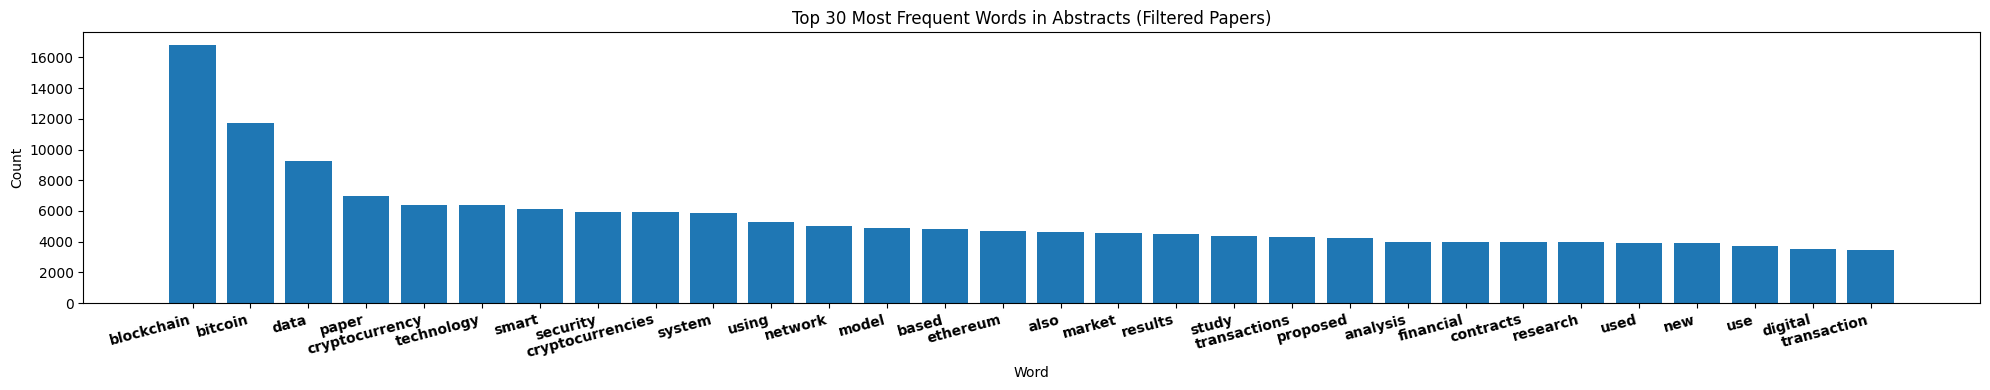

In [4]:
all_abstracts = ' '.join(df_filtered['Abstract'].dropna().astype(str))

clean_text = re.sub(r'[^a-zA-Z\s]', '', all_abstracts).lower()


tokenizer = TreebankWordTokenizer()

tokens = tokenizer.tokenize(clean_text)


stop_words = set(stopwords.words('english'))
tokens_filtered = [word for word in tokens if word not in stop_words and len(word) > 2]

word_counts = Counter(tokens_filtered)
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False).reset_index(drop=True)

top_words = word_df.head(30)
plt.figure(figsize=(20, 4))
plt.bar(top_words['Word'], top_words['Count'])
plt.xticks(rotation=15, ha='right', fontsize=10, fontweight='heavy')
plt.title('Top 30 Most Frequent Words in Abstracts (Filtered Papers)')
plt.xlabel('Word')
plt.ylabel('Count')
plt.tight_layout()
# plt.savefig('Results/Top30_Abstract_Words.png', dpi=144)
plt.show()


In [5]:
columns_to_check = ['Asset Allocation', 'Indexing', 'Bubbles', 'Valuation Models', 'Trading', 'Relative', 'Quality', 'Innovation', 'Timeliness']

df[df[columns_to_check].eq(10).any(axis=1)]

,Unnamed: 0,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,...,EID,Asset Allocation,Indexing,Bubbles,Valuation Models,Trading,Relative,Quality,Innovation,Timeliness
83,2072,Attardo S.,"Attardo, Salvatore (6701698312)",6701698312,Humor 2.0: How the internet changed humor,2023,Humor 2.0: How the Internet Changed Humor,NaN,NaN,NaN,...,2-s2.0-85171407547,1.0,1.0,1.0,1.0,1.0,10.0,4.0,3.0,4.0
347,3221,Fang F.; Ventre C.; Basios M.; Kanthan L.; Mar...,"Fang, Fan (57221135841); Ventre, Carmine (8839...",57221135841; 8839217000; 55553976500; 57195631...,Cryptocurrency trading: a comprehensive survey,2022,Financial Innovation,8,1,13,...,2-s2.0-85124487378,8.0,7.0,9.0,6.0,10.0,9.0,8.0,7.0,8.0
881,4634,Jain A.; Lin H.; Sahai A.,"Jain, Aayush (57190376711); Lin, Huijia (23967...",57190376711; 23967787300; 57206236820,Indistinguishability obfuscation from well-fou...,2021,Proceedings of the Annual ACM Symposium on The...,NaN,NaN,NaN,...,2-s2.0-85108143969,1.0,1.0,1.0,1.0,1.0,10.0,8.0,9.0,7.0
1515,6029,Das D.S.; Rawat D.S.; Maity D.; Dash S.S.; Sin...,"Das, Deep Shekhar (57212306017); Rawat, Dinesh...",57212306017; 57213685756; 20734661100; 5719000...,Species richness patterns of different life-fo...,2020,Taiwania,65,2,NaN,...,2-s2.0-85081546444,1.0,1.0,1.0,1.0,1.0,10.0,4.0,2.0,2.0
3273,9510,Sefton-Green R.,"Sefton-Green, Ruth (55824804500)",55824804500,French and English crypto-nationalism and Euro...,2012,European Review of Contract Law,8,3,NaN,...,2-s2.0-85016342628,1.0,1.0,1.0,1.0,1.0,10.0,4.0,2.0,2.0
3339,9654,Kent E.F.,"Kent, Eliza F. (35068224400)",35068224400,"Secret christians of Sivakasi: Gender, syncret...",2011,Journal of the American Academy of Religion,79,3,NaN,...,2-s2.0-80052509026,1.0,1.0,1.0,1.0,1.0,10.0,4.0,2.0,2.0
3890,10789,Kiayias A.; Zhou H.-S.,"Kiayias, Aggelos (6603298818); Zhou, Hong-Shen...",6603298818; 15020070900,Concurrent blind signatures without random ora...,2006,Lecture Notes in Computer Science (including s...,4116 LNCS,NaN,NaN,...,2-s2.0-33750018910,1.0,1.0,1.0,1.0,1.0,10.0,8.0,9.0,4.0
4286,11640,Santore U.J.,"Santore, U.J. (6507529991)",6507529991,Flagellar and body scales in the cryptophyceae,1983,British Phycological Journal,18,3,NaN,...,2-s2.0-0344230196,1.0,1.0,1.0,1.0,1.0,10.0,2.0,2.0,2.0
4328,11731,Francis E.H.,"Francis, E. Howel (7005580874)",7005580874,II.—Volcanic Neck Emplacement and Subsidence S...,1962,Transactions of the Royal Society of Edinburgh,65,2,NaN,...,2-s2.0-11144257523,1.0,1.0,1.0,1.0,1.0,10.0,2.0,1.0,1.0
4910,17027,Guarino A.; Grilli L.; Santoro D.; Messina F.;...,"Guarino, Alfonso (57201983991); Grilli, Luca (...",57201983991; 57222347021; 57222171609; 5795120...,To learn or not to learn? Evaluating autonomou...,2022,Neural Computing and Applications,34,23,NaN,...,2-s2.0-85141116800,4.0,2.0,9.0,3.0,10.0,8.0,7.0,8.0,7.0


In [18]:
# 'Asset Allocation', 'Indexing', 'Bubbles', 'Valuation Models', 'Trading'
topic = 'Valuation Models'

# score_columns = ['Relative', 'Quality', 'Innovation', 'Timeliness']
score_columns = ['Relative', 'Quality']

df['Score_Sum'] = df[[topic] + score_columns].sum(axis=1)

cited_log = np.log1p(df['Cited by'].fillna(0))
df['Cited_by_Scaled'] = 1 + 9 * (cited_log - cited_log.min()) / (cited_log.max() - cited_log.min())

df['Weighted_Score'] = (df['Score_Sum'] + df['Cited_by_Scaled']) / 4
df['Weighted_Score'] = (df['Score_Sum']) / 3

df_sorted = df.sort_values(by='Weighted_Score', ascending=False).reset_index(drop=True)
test1 = df_sorted.iloc[:, [1, 4, 5, 6, 13] + list(range(-12, 0))]

test1.to_csv('Valuation Models Reading List.csv', index=False)

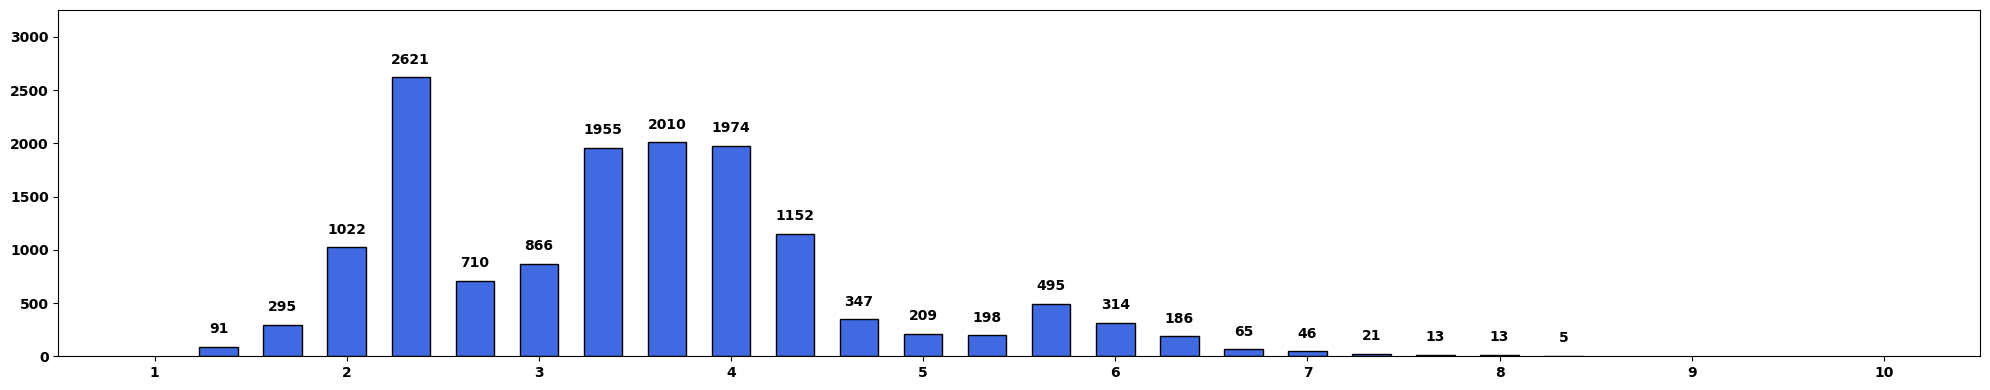

In [11]:
tracking = 'Weighted_Score'

plt.figure(figsize=(20, 4))
counts = df[tracking].value_counts().sort_index()
bars = plt.bar(counts.index, counts.values, color='royalblue', width=0.2, edgecolor='black')
for x, y in zip(counts.index, counts.values):
    plt.text(x, y+100, str(y), ha='center', va='bottom', fontsize=10, fontweight='heavy')

plt.xlabel('')
plt.ylabel('')
plt.xlim(0.5, 10.5)
plt.ylim(0, counts.max()*1.05+500)
plt.xticks(np.arange(1, 11), fontsize=10, fontweight='heavy')
plt.yticks(fontsize=10, fontweight='heavy')
plt.grid(False)
plt.tight_layout()
plt.show()